In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train: ", x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values



x_train:  (50000, 32, 32, 3)


In [12]:
x_train, x_test = x_train , x_test 
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test, (Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (50000, 3072)
x_test:  (10000, 3072)
y_train:  (50000, 10)
y_test:  (10000, 10)


In [13]:
def sigmoid(z):
    s = 1./(1 + np.exp(-z))
    return s

In [14]:
def calc_accuracy(x,y):
    h = sigmoid( np.matmul(x, w1) + b1 )
    f = np.matmul(h, w2) + b2
    pred = np.zeros(f.shape)
    pred[np.arange(f.shape[0]), np.argmax(f, axis=1)] = 1
    same = 0
    m = x_test.shape[0]
    for i in range(m):
        if( np.array_equal(pred[i],y[i]) ):
            same +=1
    accuracy = 100*same/m
    return accuracy

In [16]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros((1,H))
w2 = std*np.random.randn(H, K)
b2 = np.zeros((1,K))
print("w1:", w1.shape)
print("w2:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 0.018
lr_decay= 0.999
reg = 5e-8
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass

    X = x_train[indices]
    Y = y_train[indices]

    h = sigmoid( np.matmul(X, w1) + b1 )
    y_pred = np.matmul(h, w2) + b2
    dy = y_pred - Y
    loss = (1/batch_size)*np.square(dy).sum() + reg*( np.sum(w1**2) + np.sum(w2**2) )
    loss_history.append(loss)
    #if t%20==0:
    print("t = ",t," ;loss = ",loss)
    
    # Backward pass
    dw2 = (2/batch_size)* np.matmul(h.T, dy) + 2*reg*w2
    db2 = (2/batch_size)* np.sum(dy, axis = 0)

    dh = (2/batch_size)* np.matmul(dy, w2.T)
    dz1 = dh*h*(1-h)
    dw1 = np.matmul(X.T, dz1) + 2*reg*w1
    db1 = np.sum(dz1, axis = 0)

    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr = lr_decay*lr

    train_acc_history.append( calc_accuracy(x_train,y_train) )
    val_acc_history.append( calc_accuracy(x_test,y_test) )


w1: (3072, 200)
w2: (1, 200)
t =  0  ;loss =  0.9999445136984209
t =  1  ;loss =  0.9698365408394864
t =  2  ;loss =  0.9484689815656143
t =  3  ;loss =  0.9324516419503952
t =  4  ;loss =  0.9183500730547083
t =  5  ;loss =  0.9108544668450588
t =  6  ;loss =  0.9151691293007708
t =  7  ;loss =  0.8888151139157303
t =  8  ;loss =  0.890880565693678
t =  9  ;loss =  0.8784334398552974
t =  10  ;loss =  0.873494891364671
t =  11  ;loss =  0.8626897875259132
t =  12  ;loss =  0.8635900500642556
t =  13  ;loss =  0.8588734601799133
t =  14  ;loss =  0.8708842765755996
t =  15  ;loss =  0.8647823393274247
t =  16  ;loss =  0.8504816769793415
t =  17  ;loss =  0.8438634332506606
t =  18  ;loss =  0.8416753563800468
t =  19  ;loss =  0.8435916018850534
t =  20  ;loss =  0.8512332379272922
t =  21  ;loss =  0.8425068083051269
t =  22  ;loss =  0.8399358323445284
t =  23  ;loss =  0.8386715374372401
t =  24  ;loss =  0.8356179135736973
t =  25  ;loss =  0.8351950877087405
t =  26  ;loss =  0.8

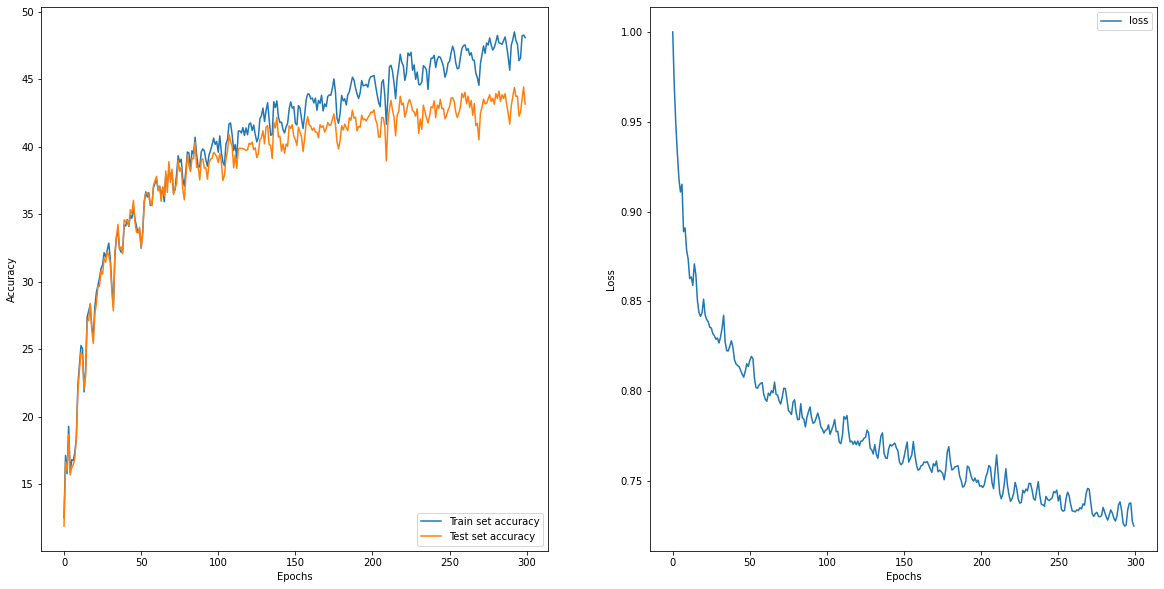

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(train_acc_history, label='Train set accuracy')
ax[0].plot(val_acc_history, label = 'Test set accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

ax[1].plot(loss_history, label='loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

In [18]:
print(loss_history[-1])
print(train_acc_history[-1])
print(val_acc_history[-1])

0.7249771428966277
48.07
43.15
